# Machine Learning on Text: Clustering Assignment

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
pip install --user -U nltk

Requirement already up-to-date: nltk in /Users/tarrantcarter/.local/lib/python3.8/site-packages (3.5)


ERROR:root:Cannot parse: 1:4: pip install --user -U nltk
Traceback (most recent call last):
  File "/Users/tarrantcarter/miniconda3/lib/python3.8/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/Users/tarrantcarter/miniconda3/lib/python3.8/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/Users/tarrantcarter/miniconda3/lib/python3.8/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/Users/tarrantcarter/miniconda3/lib/python3.8/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install --user -U nltk


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

<IPython.core.display.Javascript object>

In [4]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tarrantcarter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tarrantcarter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tarrantcarter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<IPython.core.display.Javascript object>

### Ingest the company_profiles data set into a corpus.

In [5]:
PATH = "/Users/tarrantcarter/Downloads/company_profiles/"
DOC_PATTERN = r".*\.txt"
corpus = PlaintextCorpusReader(PATH, DOC_PATTERN)

<IPython.core.display.Javascript object>

### Create a list of documents by extracting the raw text for each fileid in the corpus.

In [6]:
docs = [corpus.raw(fileid) for fileid in corpus.fileids()]
docs[0]

"Agilent Technologies, Inc. provides application focused solutions to the life sciences, diagnostics, and applied chemical markets worldwide. It operates in three segments: Life Sciences and Applied Markets, Diagnostics and Genomics, and Agilent CrossLab. The Life Sciences and Applied Markets segment offers liquid chromatography systems and components; liquid chromatography mass spectrometry systems; gas chromatography systems and components; gas chromatography mass spectrometry systems; inductively coupled plasma mass spectrometry instruments; atomic absorption instruments; microwave plasma-atomic emission spectrometry instruments; inductively coupled plasma optical emission spectrometry instruments; raman spectroscopy; microfluidics based automated electrophoresis products; cell analysis plate based assays; laboratory software and informatics systems; laboratory automation; dissolution testing; vacuum pumps; and measurement technologies. The Diagnostics and Genomics segment provides 

<IPython.core.display.Javascript object>

### Preprocess the documents, including the steps below.

- Word tokenize the document.
- Lowercase all tokens.
- Lemmatize and stem the tokens.
- Remove stop words and punctuation.

In [7]:
def preprocess(docs):
    lemmatizer = WordNetLemmatizer()
    stemmer = SnowballStemmer("english")
    preprocessed = []

    for doc in docs:
        tokenized = word_tokenize(doc)

        cleaned = [
            stemmer.stem(lemmatizer.lemmatize(token.lower()))
            for token in tokenized
            if token.lower() not in stopwords.words("english")
            if token.isalpha()
        ]

        untokenized = " ".join(cleaned)

        preprocessed.append(untokenized)

    return preprocessed

<IPython.core.display.Javascript object>

In [8]:
preprocessed = preprocess(docs)

<IPython.core.display.Javascript object>

In [9]:
preprocessed[0]

'agil technolog provid applic focus solut life scienc diagnost appli chemic market worldwid oper three segment life scienc appli market diagnost genom agil crosslab life scienc appli market segment offer liquid chromatographi system compon liquid chromatographi mass spectrometri system gas chromatographi system compon gas chromatographi mass spectrometri system induct coupl plasma mass spectrometri instrument atom absorpt instrument microwav emiss spectrometri instrument induct coupl plasma optic emiss spectrometri instrument raman spectroscopi microfluid base autom electrophoresi product cell analysi plate base assay laboratori softwar informat system laboratori autom dissolut test vacuum pump measur technolog diagnost genom segment provid reagent instrument softwar consum array dna mutat detect genotyp gene copi number determin identif gene rearrang dna methyl profil gene express profil well sequenc target enrich servic equip focus product synthes oligonucleotid use activ pharmaceut 

<IPython.core.display.Javascript object>

### TF-IDF vectorize the preprocessed documents.

In [10]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(preprocessed)
vectorized = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())

vectorized.head()

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,...,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.240561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

### Determine the optimal number of clusters using the Yellowbrick library's KElbow Visualizer and a KMeans clustering algorithm.

/Users/tarrantcarter/miniconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/tarrantcarter/miniconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/Users/tarrantcarter/miniconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/Users/tarrantcarter/miniconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an in

KElbowVisualizer(ax=<AxesSubplot:>, k=None, metric='silhouette', model=None)

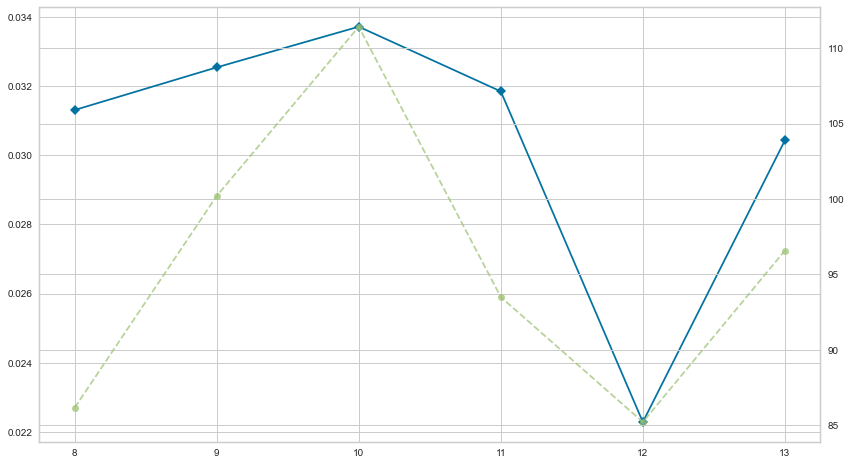

<IPython.core.display.Javascript object>

In [11]:
from pylab import rcParams

rcParams["figure.figsize"] = 14, 8


model = KMeans()
visualizer = KElbowVisualizer(model, k=(8, 14), metric="silhouette")

visualizer.fit(vectorized)

### Perform K-Means Clustering using the optimal number of clusters determine in the previous step.

In [12]:
model = KMeans(n_clusters=10)
clusters = model.fit_predict(vectorized)
clusters

array([2, 3, 3, ..., 3, 0, 9], dtype=int32)

<IPython.core.display.Javascript object>

In [13]:
df = pd.DataFrame(docs, columns=["text"])
df.head()

,text
0,"Agilent Technologies, Inc. provides applicatio..."
1,"Alcoa Corporation produces and sells bauxite, ..."
2,"AAC Holdings, Inc. provides inpatient and outp..."
3,"American Airlines Group Inc., through its subs..."
4,"Altisource Asset Management Corporation, an as..."


<IPython.core.display.Javascript object>

In [14]:
df["title"] = corpus.fileids()
df["cluster"] = clusters

df.head(15)

,text,title,cluster
0,"Agilent Technologies, Inc. provides applicatio...",A-profile.txt,2
1,"Alcoa Corporation produces and sells bauxite, ...",AA-profile.txt,3
2,"AAC Holdings, Inc. provides inpatient and outp...",AAC-profile.txt,3
3,"American Airlines Group Inc., through its subs...",AAL-profile.txt,3
4,"Altisource Asset Management Corporation, an as...",AAMC-profile.txt,5
5,"Atlantic American Corporation, through its sub...",AAME-profile.txt,1
6,"Aaron's, Inc. operates as an omnichannel provi...",AAN-profile.txt,0
7,"Applied Optoelectronics, Inc. designs, manufac...",AAOI-profile.txt,2
8,"AAON, Inc., together with its subsidiaries, en...",AAON-profile.txt,2
9,"Advance Auto Parts, Inc. provides automotive r...",AAP-profile.txt,2


<IPython.core.display.Javascript object>

### Perform Agglomerative Clustering using the same number of clusters.

In [15]:
model = AgglomerativeClustering(n_clusters=10)
clusters = model.fit_predict(vectorized)

<IPython.core.display.Javascript object>

In [16]:
df = pd.DataFrame(docs, columns=["text"])
df["title"] = corpus.fileids()
df["cluster"] = clusters

df.head(15)

,text,title,cluster
0,"Agilent Technologies, Inc. provides applicatio...",A-profile.txt,0
1,"Alcoa Corporation produces and sells bauxite, ...",AA-profile.txt,8
2,"AAC Holdings, Inc. provides inpatient and outp...",AAC-profile.txt,0
3,"American Airlines Group Inc., through its subs...",AAL-profile.txt,8
4,"Altisource Asset Management Corporation, an as...",AAMC-profile.txt,3
5,"Atlantic American Corporation, through its sub...",AAME-profile.txt,6
6,"Aaron's, Inc. operates as an omnichannel provi...",AAN-profile.txt,0
7,"Applied Optoelectronics, Inc. designs, manufac...",AAOI-profile.txt,8
8,"AAON, Inc., together with its subsidiaries, en...",AAON-profile.txt,8
9,"Advance Auto Parts, Inc. provides automotive r...",AAP-profile.txt,8


<IPython.core.display.Javascript object>

### Choose one of the three topic modeling approaches covered. Cluster into the optimal number of clusters and extract 5 keywords that represent the documents in each cluster.

In [17]:
# non-negative matrix facotrization
from sklearn.decomposition import NMF

num_keywords = 5
num_topics = 3

# vectorize docs
vectorizer = TfidfVectorizer()
model = NMF(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

array([[0.        , 0.07265404, 0.0052554 ],
       [0.00243378, 0.03047082, 0.01699538],
       [0.01063867, 0.05428699, 0.00224344],
       ...,
       [0.00332181, 0.05585005, 0.00152909],
       [0.        , 0.03781271, 0.00917004],
       [0.        , 0.03246101, 0.00073762]])

<IPython.core.display.Javascript object>

In [18]:
pd.DataFrame(model.components_, columns=vectorizer.get_feature_names())

,aaa,aac,aad,aaon,aar,aaron,aastrom,aav,ab,abacus,...,zvex,zydeco,zydelig,zydi,zynerba,zynga,zyrtec,zytiga,zyvox,übermonst
0,0.000036,0.000053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
1,0.000522,0.001253,0.000766,0.002591,0.001824,0.002608,0.000682,0.001761,0.002315,0.000739,...,0.000603,0.000000,0.000395,0.000776,0.001198,0.003392,0.0006,0.000343,0.000569,0.000097
2,0.000336,0.000000,0.000000,0.000834,0.000000,0.001123,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000958,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000139


<IPython.core.display.Javascript object>

In [19]:
for index, topic in enumerate(model.components_):
    print("topic", index)
    # sort scores and grab the index of top scoring words in each topic
    for i in topic.argsort()[: -num_keywords - 1 : -1]:
        # term, component score
        print(vectorizer.get_feature_names()[i], topic[i])

    print("--------------------------------")

topic 0
loan 1.9752534631574779
bank 1.3149296439294247
deposit 0.9534441922239152
account 0.8396299835634073
servic 0.7222410877823021
--------------------------------
topic 1
servic 0.8812137664494751
product 0.7598958140490663
segment 0.6084567664517806
solut 0.5614632114961663
system 0.5521342407409433
--------------------------------
topic 2
gas 1.1397481590451912
natur 0.8761653975337189
oil 0.8648707287585403
energi 0.4769800421984857
texa 0.3779684519255853
--------------------------------


<IPython.core.display.Javascript object>

In [20]:
from sklearn.decomposition import LatentDirichletAllocation

num_keywords = 5
num_topics = 3

# vectorize docs
vectorizer = CountVectorizer()
model = LatentDirichletAllocation(n_components=num_topics, learning_method="online")

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

array([[0.48316287, 0.00198792, 0.51484921],
       [0.98432471, 0.0082359 , 0.00743939],
       [0.14955419, 0.28883451, 0.5616113 ],
       ...,
       [0.063881  , 0.06093768, 0.87518132],
       [0.05475641, 0.93752004, 0.00772355],
       [0.00557808, 0.00584745, 0.98857446]])

<IPython.core.display.Javascript object>

In [21]:
for index, topic in enumerate(model.components_):
    print("topic", index)
    # sort scores and grab the index of top scoring words in each topic
    for i in topic.argsort()[: -num_keywords - 1 : -1]:
        # term, component score
        print(vectorizer.get_feature_names()[i], topic[i])

    print("--------------------------------")

topic 0
product 4899.3236875137845
servic 4564.980829632581
compani 4556.427131399545
segment 3134.8583002075293
provid 2792.7795110426664
--------------------------------
topic 1
compani 3915.4626247253877
servic 3781.2962071716424
loan 2638.03403758469
oper 2340.9366961749333
product 2133.9925754494675
--------------------------------
topic 2
compani 1626.7043476344
product 1235.4187181393686
develop 1166.1881095937158
treatment 917.1432517623653
clinic 771.6820123034317
--------------------------------


<IPython.core.display.Javascript object>

In [22]:
from sklearn.decomposition import TruncatedSVD

num_keywords = 5
num_topics = 3

# vectorize docs
vectorizer = TfidfVectorizer()
model = TruncatedSVD(n_components=num_topics)

vectorized = vectorizer.fit_transform(preprocessed)
model.fit_transform(vectorized)

array([[ 0.14052071, -0.15513128, -0.06077441],
       [ 0.0921353 , -0.0677255 ,  0.01761097],
       [ 0.15364015, -0.07861686, -0.05272865],
       ...,
       [ 0.13268923, -0.0950352 , -0.04105628],
       [ 0.0907725 , -0.07818085,  0.00536541],
       [ 0.06228634, -0.0663956 , -0.04428995]])

<IPython.core.display.Javascript object>

In [23]:
for index, topic in enumerate(model.components_):
    print("topic", index)
    # sort scores and grab the index of top scoring words in each topic
    for i in topic.argsort()[: -num_keywords - 1 : -1]:
        # term, component score
        print(vectorizer.get_feature_names()[i], topic[i])

    print("--------------------------------")

topic 0
loan 0.3334447443095227
servic 0.30003607455917136
bank 0.23643019800397097
compani 0.18164072745262635
product 0.17947223391695208
--------------------------------
topic 1
loan 0.4434480439918294
bank 0.26536240874478334
deposit 0.2076080005555375
account 0.1741651194287713
estat 0.10540058126825279
--------------------------------
topic 2
gas 0.40733112183792447
natur 0.3210024447860466
oil 0.3126710190087522
energi 0.1547410575221715
texa 0.13612339066572388
--------------------------------


<IPython.core.display.Javascript object>